# Model Training Module

Now that we have our cleaned dataset, we can finally start training our models to predict real estate price.

Importing important libraries


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Import specified linear algorithms
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import specified ensemble algorithms 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

%matplotlib inline

In [74]:
df = pd.read_csv('datas/training_data.csv')

In [75]:
# drop duplicates and unwanted columns
df.drop_duplicates()
df = df.drop(df.columns[0], axis=1)
df = df.drop(columns= ['хаяг'])
df = df.drop(columns= ['PricePerArea'])
df.head()


үнэ  Тагт  Гараж  Барилгын давхар  Талбай  Хэдэн давхарт  \
0 141.400     1      0               16  50.500              3   
1 180.000     1      0               12  50.000              7   
2 145.000     1      0               12  50.320              8   
3 160.000     0      0                6  60.000              6   
4 210.000     1      0               16  49.500              3   

   Лизингээр авах боломж  Цонхны тоо  Барилгын явц  Нас  floor-ratio  \
0                      0           2         0.000    0        0.188   
1                      0           2         1.000   10        0.583   
2                      0           3         1.000    8        0.667   
3                      1           4         1.000   16        1.000   
4                      0           2         1.000    9        0.188   

   Цонх-Бусад  Цонх-Вакум  Дүүрэг-УБ  Багануур  Дүүрэг-УБ  Баянгол  \
0       False        True                False               False   
1       False        True                False               False   
2       False        True                False               False   
3       False        True                False                True   
4       False        True                False               False   

   Дүүрэг-УБ  Баянзүрх  Дүүрэг-УБ  Налайх  Дүүрэг-УБ  Сонгинохайрхан  \
0                 True              False                      False   
1                False              False                      False   
2                 True              False                      False   
3                False              False                      False   
4                False              False                      False   

   Дүүрэг-УБ  Сүхбаатар  Дүүрэг-УБ  Хан-Уул  Дүүрэг-УБ  Чингэлтэй  \
0                 False               False                 False   
1                 False               False                  True   
2                 False               False                 False   
3                 False               False                 False   
4                  True               False                 False   

   Хаалга-Бусад  Хаалга-Бүргэд  Хаалга-Төмөр  Шал-Бусад  Шал-Паркет  \
0         False           True         False      False        True   
1         False           True         False      False        True   
2         False           True         False      False        True   
3         False           True         False      False        True   
4         False          False          True      False        True   

   Category-High  Category-Low  Category-Medium  totalfloorlog  agelog  
0          False          True            False          2.773   0.693  
1          False          True            False          2.485   2.485  
2          False         False             True          2.485   2.303  
3          False         False             True          1.792   2.890  
4          False         False             True          2.773   2.398

In [76]:
df['үнэ'].describe()


count   5741.000
mean     268.769
std      152.372
min       45.000
25%      155.000
50%      220.000
75%      350.000
max      825.000
Name: үнэ, dtype: float64

In [77]:
df['Нас'].describe()

count   5741.000
mean       5.766
std        5.725
min        0.000
25%        1.000
50%        4.000
75%       10.000
max       25.000
Name: Нас, dtype: float64

In [78]:
df['Талбай'].describe()

count   5741.000
mean      71.923
std       27.832
min       18.000
25%       50.530
50%       66.000
75%       90.000
max      150.000
Name: Талбай, dtype: float64

In [79]:
df.columns

Index(['үнэ', 'Тагт', 'Гараж', 'Барилгын давхар', 'Талбай', 'Хэдэн давхарт',
       'Лизингээр авах боломж', 'Цонхны тоо', 'Барилгын явц', 'Нас',
       'floor-ratio', 'Цонх-Бусад', 'Цонх-Вакум', 'Дүүрэг-УБ  Багануур',
       'Дүүрэг-УБ  Баянгол', 'Дүүрэг-УБ  Баянзүрх', 'Дүүрэг-УБ  Налайх',
       'Дүүрэг-УБ  Сонгинохайрхан', 'Дүүрэг-УБ  Сүхбаатар',
       'Дүүрэг-УБ  Хан-Уул', 'Дүүрэг-УБ  Чингэлтэй', 'Хаалга-Бусад',
       'Хаалга-Бүргэд', 'Хаалга-Төмөр', 'Шал-Бусад', 'Шал-Паркет',
       'Category-High', 'Category-Low', 'Category-Medium', 'totalfloorlog',
       'agelog'],
      dtype='object')

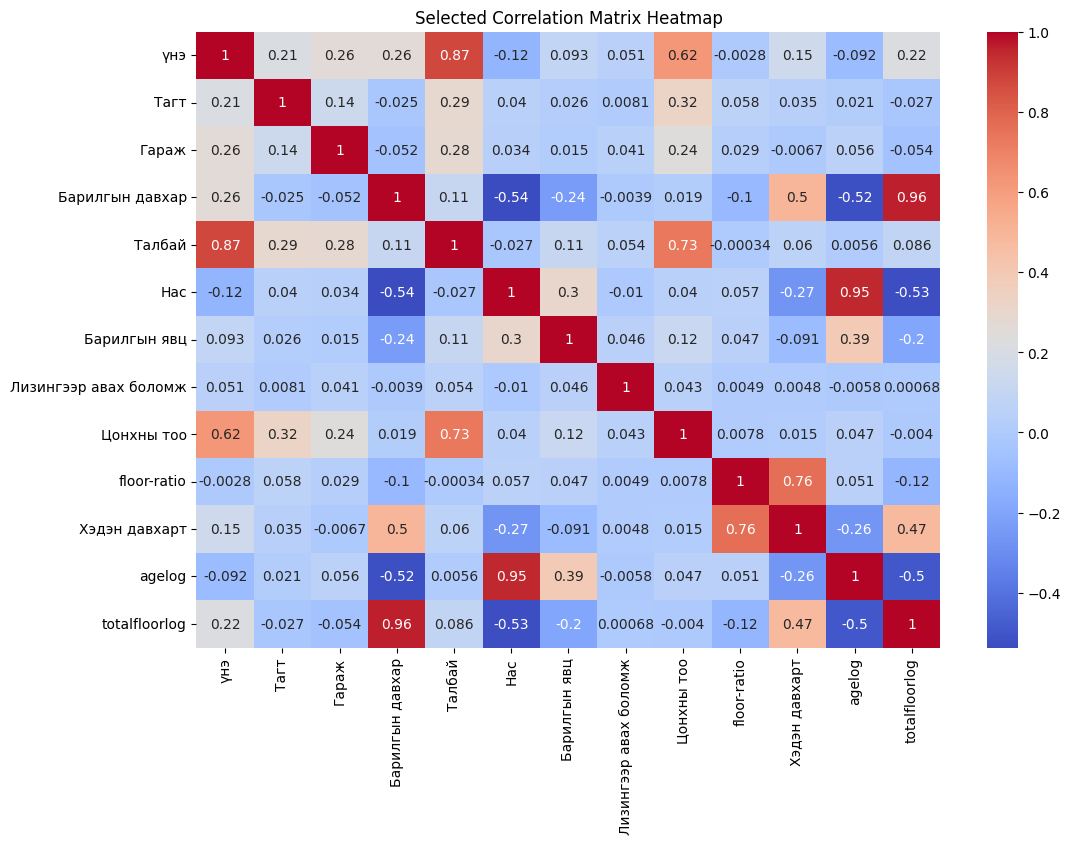

In [80]:
correlation_matrix = df.corr()

# Select specific columns and rows for the heatmap
selected_columns = ['үнэ', 'Тагт', 'Гараж', 'Барилгын давхар',
                     'Талбай', 'Нас',
                       'Барилгын явц', 'Лизингээр авах боломж', 'Цонхны тоо', 'floor-ratio', 'Хэдэн давхарт', 'agelog', 'totalfloorlog']
correlation_matrix_selected = correlation_matrix.loc[selected_columns, selected_columns]

# Display the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm')
plt.title('Selected Correlation Matrix Heatmap')
plt.show()

In [81]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'df' is your dataframe and it contains only numerical features

# If your dataframe has both numerical and categorical variables, you need to separate them first and only use the numerical ones.
numerical_features = df.select_dtypes(include=[np.number])
numerical_features = numerical_features.drop(columns = ['үнэ'])
numerical_features = numerical_features.drop(columns = ['floor-ratio', 'totalfloorlog', 'agelog'])


# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]

print(vif_data)



                 Feature    VIF
0                   Тагт  6.426
1                  Гараж  1.357
2        Барилгын давхар 10.551
3                 Талбай 17.536
4          Хэдэн давхарт  4.738
5  Лизингээр авах боломж  1.422
6             Цонхны тоо 16.824
7           Барилгын явц  9.690
8                    Нас  2.607


Since number of windows has a high VIF let's try discarding it and training our model


In [82]:
df = df.drop(columns = ['Цонхны тоо'])
df = df.drop(columns = ['Хэдэн давхарт'])

## Split Dataset for training and testing.

In [83]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
import lightgbm as lgb
import catboost as cb


In [84]:
df[df['Нас'] == 0].shape


(1427, 29)

In [85]:
df

үнэ  Тагт  Гараж  Барилгын давхар  Талбай  Лизингээр авах боломж  \
0    141.400     1      0               16  50.500                      0   
1    180.000     1      0               12  50.000                      0   
2    145.000     1      0               12  50.320                      0   
3    160.000     0      0                6  60.000                      1   
4    210.000     1      0               16  49.500                      0   
...      ...   ...    ...              ...     ...                    ...   
5736 610.000     1      1               16 122.000                      0   
5737  90.000     1      0                9  38.000                      0   
5738 150.000     0      0               12  41.000                      0   
5739 218.700     1      1               16  73.000                      1   
5740 236.600     2      1               16  91.080                      0   

      Барилгын явц  Нас  floor-ratio  Цонх-Бусад  Цонх-Вакум  \
0            0.000    0        0.188       False        True   
1            1.000   10        0.583       False        True   
2            1.000    8        0.667       False        True   
3            1.000   16        1.000       False        True   
4            1.000    9        0.188       False        True   
...            ...  ...          ...         ...         ...   
5736         1.000    4        0.688       False        True   
5737         1.000    7        0.889       False        True   
5738         1.000    5        0.500       False        True   
5739         0.000    0        0.562       False        True   
5740         1.000    1        0.938       False        True   

      Дүүрэг-УБ  Багануур  Дүүрэг-УБ  Баянгол  Дүүрэг-УБ  Баянзүрх  \
0                   False               False                 True   
1                   False               False                False   
2                   False               False                 True   
3                   False                True                False   
4                   False               False                False   
...                   ...                 ...                  ...   
5736                False               False                 True   
5737                False               False                False   
5738                False               False                 True   
5739                False                True                False   
5740                False               False                False   

      Дүүрэг-УБ  Налайх  Дүүрэг-УБ  Сонгинохайрхан  Дүүрэг-УБ  Сүхбаатар  \
0                 False                      False                 False   
1                 False                      False                 False   
2                 False                      False                 False   
3                 False                      False                 False   
4                 False                      False                  True   
...                 ...                        ...                   ...   
5736              False                      False                 False   
5737              False                       True                 False   
5738              False                      False                 False   
5739              False                      False                 False   
5740              False                      False                 False   

      Дүүрэг-УБ  Хан-Уул  Дүүрэг-УБ  Чингэлтэй  Хаалга-Бусад  Хаалга-Бүргэд  \
0                  False                 False         False           True   
1                  False                  True         False           True   
2                  False                 False         False           True   
3                  False                 False         False           True   
4                  False                 False         False          False   
...                  ...                   ...           ...            ...   
5736    

In [86]:
# object for our target variable

y = df['үнэ']


# seperate object for our input features

X = df.drop(['үнэ', 'agelog', 'totalfloorlog'], axis=1)

In [87]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, shuffle=True)

# verify length of each set
len(X_train), len(X_test), len(y_train), len(y_test)

(4592, 1149, 4592, 1149)

## Model with default parameters



In [88]:
X_test.describe()

Тагт    Гараж  Барилгын давхар   Талбай  Лизингээр авах боломж  \
count 1149.000 1149.000         1149.000 1149.000               1149.000   
mean     1.042    0.194           13.018   72.711                  0.300   
std      0.463    0.396            4.356   28.022                  0.459   
min      0.000    0.000            2.000   18.000                  0.000   
25%      1.000    0.000           10.000   51.450                  0.000   
50%      1.000    0.000           13.000   66.520                  0.000   
75%      1.000    0.000           16.000   90.000                  1.000   
max      3.000    1.000           25.000  150.000                  1.000   

       Барилгын явц      Нас  floor-ratio  
count      1149.000 1149.000     1149.000  
mean          0.909    5.587        0.573  
std           0.287    5.768        0.287  
min           0.000    0.000        0.059  
25%           1.000    0.000        0.333  
50%           1.000    4.000        0.565  
75%           1.000    9.000        0.833  
max           1.000   25.000        1.000

In [89]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [90]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

### Linear Regression

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
linear = LinearRegression()

linear.fit(X_train, y_train)

y_pred_lr = linear.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_lr)
print("Mean Absolute Error = ", mae)
print("Training Accuracy = ", linear.score(X_train, y_train))
print("Test Accuracy     = ", linear.score(X_test, y_test))

Mean Absolute Error =  44.6752319197836
Training Accuracy =  0.8400129934789418
Test Accuracy     =  0.8450035593348153


### Decision Tree Regressor

In [92]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state = 123)
dt.fit(X_train, y_train)
y_pred_dt= dt.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_dt)
print("Mean Absolute Error = ", mae)
print("Training Accuracy = ", dt.score(X_train, y_train))
print("Test Accuracy     = ", dt.score(X_test, y_test))

Mean Absolute Error =  33.891069799825935
Training Accuracy =  0.9996778613171122
Test Accuracy     =  0.8458336777927581


### Random Forest Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 12)
rf.fit(X_train, y_train)
y_pred_rf= rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error = ", mae)
print("Training Accuracy = ", rf.score(X_train, y_train))
print("Test Accuracy     = ", rf.score(X_test, y_test))

Mean Absolute Error =  27.58504469094125
Training Accuracy =  0.9876089498268266
Test Accuracy     =  0.9221468319964052


### Default Gradient Boosting 

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

# Evaluate the performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R squared value: ', r2)


Mean Absolute Error: 35.48465714267383
Mean Squared Error: 2522.4276132162026
Root Mean Squared Error: 50.223775377964195
R squared value:  0.894847648417486


## HyperParameter Tuning with GridSearch

In [95]:
# lasso hyperparameters
lasso_hyperparameters = {
    'lasso__alpha' : [0.1, 0.2, 1, 2, 10, 20, 100, 200]
}   

# ridge hyperparameters
ridge_hyperparameters = {
    'ridge__alpha' : [0.1, 0.2, 1, 2, 10, 20, 100, 200]
}

# elastic net hyperparameters
enet_hyperparameters = {
    'elasticnet__alpha' : [0.1, 0.2, 1, 2, 10, 20, 100, 200],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}

# random forest hyperparameters
rf_hyperparameters = {
    'randomforestregressor__n_estimators' : [200, 400],
    'randomforestregressor__max_features' : [None, 'sqrt', 0.33]
}

# gradient boost hyperparameters
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [400, 500, 600],
    'gradientboostingregressor__learning_rate' : [0.1, 0.2, 1],
    'gradientboostingregressor__max_depth' : [4, 6, 8],
}

In [96]:
hyperparameters = {
    'rf' : rf_hyperparameters, 
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
}

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
fitted_models = {}

for name, pipeline in pipelines.items():
    # create cross-validation object 
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1, error_score='raise')

    # fite model on X_train, y_train
    model.fit(X_train, y_train)
    
    # store model in dictionary
    fitted_models[name] = model

    # print message after model has been fitted
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [99]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [100]:
# display the average R^2 score for each model
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.8380812167876066
ridge 0.8380813675511769
enet 0.8380437339046738
rf 0.9102554459852327
gb 0.9159922586234313


In [101]:
from sklearn.metrics import r2_score

In [102]:
from sklearn.metrics import mean_absolute_error

In [103]:
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print(name)
    print('--------')
    print('R^2:', r2_score(y_test, pred))
    range_of_target = np.max(y_test) - np.min(y_test)
    relative_mae = mean_absolute_error(y_test,pred) / range_of_target
    print('MAE:', mean_absolute_error(y_test, pred))
    print('Relative MAE:', relative_mae)

lasso
--------
R^2: 0.8449996403351203
MAE: 44.64695304844579
Relative MAE: 0.058209847520789816
ridge
--------
R^2: 0.8449890927244147
MAE: 44.66839600289088
Relative MAE: 0.05823780443662435
enet
--------
R^2: 0.8448655224369604
MAE: 44.6267783925274
Relative MAE: 0.05818354418843207
rf
--------
R^2: 0.9230262479062367
MAE: 27.528263486254463
Relative MAE: 0.03589082592732003
gb
--------
R^2: 0.9225348806773271
MAE: 28.177111332900918
Relative MAE: 0.03673678139882779


*So far Random Forest is the best model. So let's see residuals distribution and also prediction and test correlation.*

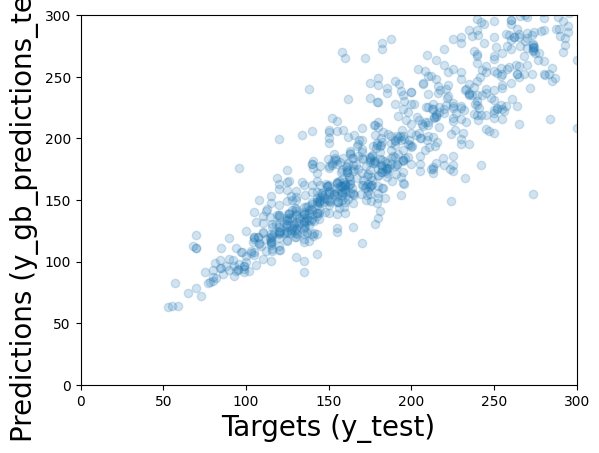

In [104]:
gbmodel = None
for name, model in fitted_models.items():
    if name == 'rf':
        gbmodel = model
        break
pred = gbmodel.predict(X_test)
plt.scatter(y_test, pred, alpha=0.2)
plt.xlabel('Targets (y_test)', size=20)
plt.ylabel('Predictions (y_gb_predictions_test)', size=20)
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

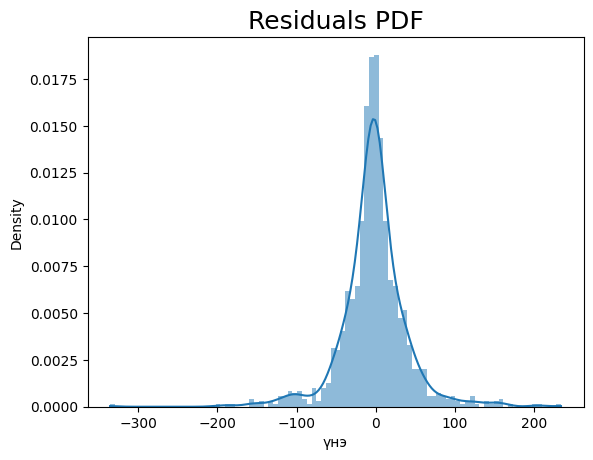

In [105]:
sns.histplot(y_test - pred, kde=True, stat="density", linewidth=0)

plt.title("Residuals PDF", size=18)

In [106]:

# df_predictions = pd.DataFrame({
#     'Actual': y_test,
#     'Талбай': X_test['Талбай'],
#     'Нас': X_test['Нас'],
#     ''})

# Create the pair plot
sns.pairplot(df,)
plt.show()

In [107]:
X_test

Тагт  Гараж  Барилгын давхар  Талбай  Лизингээр авах боломж  \
3781     1      1               17  48.700                      1   
5232     1      0                9  98.100                      0   
1745     2      0                5 120.000                      0   
3752     1      0               15  37.000                      0   
3168     1      0               16  77.500                      0   
...    ...    ...              ...     ...                    ...   
4747     1      0               12 104.750                      0   
3780     1      1               17  49.000                      1   
1022     1      0               16 104.750                      1   
4508     1      0               16  75.100                      1   
5374     2      0               12 112.640                      1   

      Барилгын явц  Нас  floor-ratio  Цонх-Бусад  Цонх-Вакум  \
3781         1.000    1        0.294       False        True   
5232         1.000   12        0.556       False        True   
1745         1.000    7        1.000       False        True   
3752         1.000    8        0.933       False        True   
3168         1.000    3        0.250       False        True   
...            ...  ...          ...         ...         ...   
4747         1.000   12        0.917       False        True   
3780         1.000    1        0.176       False        True   
1022         1.000   14        0.625       False        True   
4508         1.000    1        0.562       False        True   
5374         1.000   16        0.083       False        True   

      Дүүрэг-УБ  Багануур  Дүүрэг-УБ  Баянгол  Дүүрэг-УБ  Баянзүрх  \
3781                False               False                False   
5232                False                True                False   
1745                False               False                False   
3752                False               False                False   
3168                False                True                False   
...                   ...                 ...                  ...   
4747                False               False                False   
3780                False               False                False   
1022                False               False                False   
4508                False               False                False   
5374                False               False                False   

      Дүүрэг-УБ  Налайх  Дүүрэг-УБ  Сонгинохайрхан  Дүүрэг-УБ  Сүхбаатар  \
3781              False                      False                  True   
5232              False                      False                 False   
1745              False                      False                 False   
3752              False                       True                 False   
3168              False                      False                 False   
...                 ...                        ...                   ...   
4747              False                      False                 False   
3780              False                      False                  True   
1022              False                      False                 False   
4508              False                      False                 False   
5374              False                      False                  True   

      Дүүрэг-УБ  Хан-Уул  Дүүрэг-УБ  Чингэлтэй  Хаалга-Бусад  Хаалга-Бүргэд  \
3781               False                 False         False           True   
5232               False                 False         False           True   
1745                True                 False         False          False   
3752               False                 False         False           True   
3168               False                 False         False           True   
...                  ...                   ...           ...            ...   
4747               False                  True         False           True   
3780               Fal

In [108]:
df_pf = pd.DataFrame(pred, columns=['Prediction'])

y_test = y_test.reset_index(drop=True)
X_test = X_test.reset_index(drop = True)

df_pf['Target'] = y_test

df_pf['Residual'] =df_pf['Target'] - df_pf['Prediction']

df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
cdf_pf = pd.concat([df_pf, X_test], axis=1)
cdf_pf




Prediction  Target  Residual  Difference%  Тагт  Гараж  Барилгын давхар  \
0        176.867 213.306    36.439       17.083     1      1               17   
1        259.015 245.000   -14.015        5.720     1      0                9   
2        397.142 360.000   -37.142       10.317     2      0                5   
3        107.720 105.000    -2.720        2.590     1      0               15   
4        342.609 333.250    -9.359        2.808     1      0               16   
...          ...     ...       ...          ...   ...    ...              ...   
1144     468.747 480.000    11.253        2.344     1      0               12   
1145     172.566 195.020    22.454       11.513     1      1               17   
1146     451.291 460.000     8.709        1.893     1      0               16   
1147     283.548 240.320   -43.228       17.988     1      0               16   
1148     386.420 281.600  -104.820       37.223     2      0               12   

      Талбай  Лизингээр авах боломж  Барилгын явц  Нас  floor-ratio  \
0     48.700                      1         1.000    1        0.294   
1     98.100                      0         1.000   12        0.556   
2    120.000                      0         1.000    7        1.000   
3     37.000                      0         1.000    8        0.933   
4     77.500                      0         1.000    3        0.250   
...      ...                    ...           ...  ...          ...   
1144 104.750                      0         1.000   12        0.917   
1145  49.000                      1         1.000    1        0.176   
1146 104.750                      1         1.000   14        0.625   
1147  75.100                      1         1.000    1        0.562   
1148 112.640                      1         1.000   16        0.083   

      Цонх-Бусад  Цонх-Вакум  Дүүрэг-УБ  Багануур  Дүүрэг-УБ  Баянгол  \
0          False        True                False               False   
1          False        True                False                True   
2          False        True                False               False   
3          False        True                False               False   
4          False        True                False                True   
...          ...         ...                  ...                 ...   
1144       False        True                False               False   
1145       False        True                False               False   
1146       False        True                False               False   
1147       False        True                False               False   
1148       False        True                False               False   

      Дүүрэг-УБ  Баянзүрх  Дүүрэг-УБ  Налайх  Дүүрэг-УБ  Сонгинохайрхан  \
0                   False              False                      False   
1                   False              False                      False   
2                   False              False                      False   
3                   False              False                       True   
4                   False              False                      False   
...                   ...                ...                        ...   
1144                False              False                      False   
1145                False              False                      False   
1146                False              False                      False   
1147                False              False                      False   
1148                False              False                      False   

      Дүүрэг-УБ  Сүхбаатар  Дүүрэг-УБ  Хан-Уул  Дүүрэг-УБ  Чингэлтэй  \
0                     True               False                 False   
1                    False               False                 False   
2                    False                True                 False   
3                    False               False                 False   
4                    False               F

In [109]:
df_pf.describe()

Prediction   Target  Residual  Difference%
count    1149.000 1149.000  1149.000     1149.000
mean      273.310  271.128    -2.182       11.022
std       148.130  154.949    42.934       12.068
min        63.457   53.000  -335.734        0.006
25%       161.168  155.840   -17.956        3.077
50%       227.477  222.000    -2.394        7.174
75%       357.161  350.000    13.927       14.247
max       800.723  820.000   234.417      119.905

In [110]:
cdf_pf[(cdf_pf['Difference%']) > 10]


Prediction  Target  Residual  Difference%  Тагт  Гараж  Барилгын давхар  \
0        176.867 213.306    36.439       17.083     1      1               17   
2        397.142 360.000   -37.142       10.317     2      0                5   
7        103.869 130.000    26.131       20.101     1      0                6   
10       465.530 603.900   138.370       22.913     2      1               12   
11       182.520 153.000   -29.520       19.294     1      0               16   
...          ...     ...       ...          ...   ...    ...              ...   
1137     223.384 250.000    26.616       10.646     1      0               12   
1143     208.899 180.000   -28.899       16.055     1      0               10   
1145     172.566 195.020    22.454       11.513     1      1               17   
1147     283.548 240.320   -43.228       17.988     1      0               16   
1148     386.420 281.600  -104.820       37.223     2      0               12   

      Талбай  Лизингээр авах боломж  Барилгын явц  Нас  floor-ratio  \
0     48.700                      1         1.000    1        0.294   
2    120.000                      0         1.000    7        1.000   
7     32.000                      0         1.000   19        0.333   
10   122.000                      1         1.000    3        0.083   
11    51.000                      0         1.000    1        0.125   
...      ...                    ...           ...  ...          ...   
1137  45.100                      0         1.000    2        0.583   
1143  55.000                      0         1.000   12        0.700   
1145  49.000                      1         1.000    1        0.176   
1147  75.100                      1         1.000    1        0.562   
1148 112.640                      1         1.000   16        0.083   

      Цонх-Бусад  Цонх-Вакум  Дүүрэг-УБ  Багануур  Дүүрэг-УБ  Баянгол  \
0          False        True                False               False   
2          False        True                False               False   
7          False        True                False               False   
10          True       False                False               False   
11         False        True                False               False   
...          ...         ...                  ...                 ...   
1137       False        True                False               False   
1143       False        True                False               False   
1145       False        True                False               False   
1147       False        True                False               False   
1148       False        True                False               False   

      Дүүрэг-УБ  Баянзүрх  Дүүрэг-УБ  Налайх  Дүүрэг-УБ  Сонгинохайрхан  \
0                   False              False                      False   
2                   False              False                      False   
7                   False              False                      False   
10                   True              False                      False   
11                  False              False                      False   
...                   ...                ...                        ...   
1137                False              False                      False   
1143                 True              False                      False   
1145                False              False                      False   
1147                False              False                      False   
1148                False              False                      False   

      Дүүрэг-УБ  Сүхбаатар  Дүүрэг-УБ  Хан-Уул  Дүүрэг-УБ  Чингэлтэй  \
0                     True               False                 False   
2                    False                True                 False   
7                    False                True                 False   
10                   False               False                 False   
11                   False                

In [111]:
cdf_pf[(cdf_pf['Difference%']) > 20]

Prediction  Target  Residual  Difference%  Тагт  Гараж  Барилгын давхар  \
7        103.869 130.000    26.131       20.101     1      0                6   
10       465.530 603.900   138.370       22.913     2      1               12   
26       388.055 590.000   201.945       34.228     2      1                6   
34       398.377 525.300   126.923       24.162     1      1               14   
38       391.500 296.388   -95.112       32.090     0      0               16   
...          ...     ...       ...          ...   ...    ...              ...   
1128     448.501 336.000  -112.501       33.483     2      0               12   
1133     202.712 165.402   -37.310       22.557     1      0               16   
1134     232.484 175.000   -57.484       32.848     2      0               10   
1136     215.628 284.000    68.372       24.075     1      0               16   
1148     386.420 281.600  -104.820       37.223     2      0               12   

      Талбай  Лизингээр авах боломж  Барилгын явц  Нас  floor-ratio  \
7     32.000                      0         1.000   19        0.333   
10   122.000                      1         1.000    3        0.083   
26    93.000                      0         1.000   21        0.667   
34   103.000                      0         1.000    4        1.000   
38    82.330                      1         1.000    1        0.875   
...      ...                    ...           ...  ...          ...   
1128 105.000                      0         1.000    3        0.833   
1133  61.260                      0         0.000    0        0.250   
1134  58.000                      1         1.000   11        0.200   
1136  63.310                      0         1.000    0        0.438   
1148 112.640                      1         1.000   16        0.083   

      Цонх-Бусад  Цонх-Вакум  Дүүрэг-УБ  Багануур  Дүүрэг-УБ  Баянгол  \
7          False        True                False               False   
10          True       False                False               False   
26         False        True                False               False   
34         False        True                False               False   
38         False        True                False               False   
...          ...         ...                  ...                 ...   
1128       False        True                False               False   
1133       False        True                False               False   
1134       False        True                False               False   
1136       False        True                False               False   
1148       False        True                False               False   

      Дүүрэг-УБ  Баянзүрх  Дүүрэг-УБ  Налайх  Дүүрэг-УБ  Сонгинохайрхан  \
7                   False              False                      False   
10                   True              False                      False   
26                  False              False                      False   
34                   True              False                      False   
38                  False              False                      False   
...                   ...                ...                        ...   
1128                False              False                      False   
1133                False              False                      False   
1134                 True              False                      False   
1136                False              False                      False   
1148                False              False                      False   

      Дүүрэг-УБ  Сүхбаатар  Дүүрэг-УБ  Хан-Уул  Дүүрэг-УБ  Чингэлтэй  \
7                    False                True                 False   
10                   False               False                 False   
26                    True               False                 False   
34                   False               False                 False   
38                   False                

In [112]:
cdf_pf[(cdf_pf['Difference%']) > 50].shape

(20, 30)

## LGBM Regressor

In [113]:
from sklearn.model_selection import RandomizedSearchCV

lgbm = LGBMRegressor(learning_rate=0.05, max_depth=6, n_estimators=1000,
              num_leaves=100, random_state=123, subsample=0.5)
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 4592, number of used features: 24
[LightGBM] [Info] Start training from score 268.179409
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMRegressor(learning_rate=0.05, max_depth=6, n_estimators=1000,
              num_leaves=100, random_state=123, subsample=0.5)

In [114]:
y_hat_lb_def = lgbm.predict(X_train)

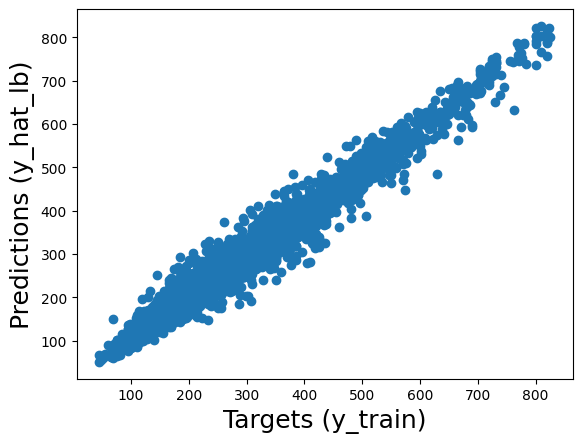

In [115]:
plt.scatter(y_train, y_hat_lb_def)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat_lb)',size=18)

plt.show()

In [116]:
y_hat_test_lb_def=lgbm.predict(X_test)

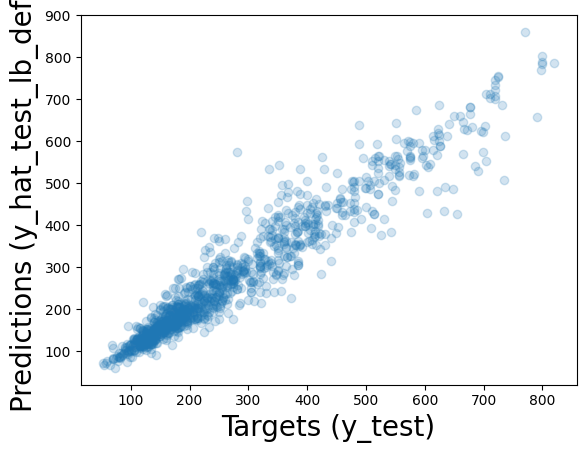

In [117]:
plt.scatter(y_test, y_hat_test_lb_def, alpha=0.2)
plt.xlabel('Targets (y_test)', size=20)
plt.ylabel('Predictions (y_hat_test_lb_def)', size=20)
plt.show()

In [118]:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_hat_test_lb_def, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_hat_test_lb_def, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_hat_test_lb_def, y_test)))

r2_lb_def = r2_score (y_hat_test_lb_def, y_test)

print ('R-squared score', round (r2_lb_def,3))

Mean Absolute Error: 29.57471023070185
Mean Squared Error: 1949.7389386800564
Root Mean Squared Error: 44.155848295328404
R-squared score 0.913


So far the best model is Gradient Boosting algorithm so let's run more testing to see where our model is failing 
shapley, importance value, check for inconsistencies 


### Checking Shap plot for Gradient Boosting Model 

In [119]:
gbmodel

GridSearchCV(cv=10, error_score='raise',
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=123))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_features': [None, 'sqrt',
                                                                 0.33],
                         'randomforestregressor__n_estimators': [200, 400]})

In [120]:
import shap

# Initialize the SHAP explainer
best_model = gbmodel.best_estimator_
gb_model = best_model.named_steps['randomforestregressor']

explainer = shap.TreeExplainer(gb_model)
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

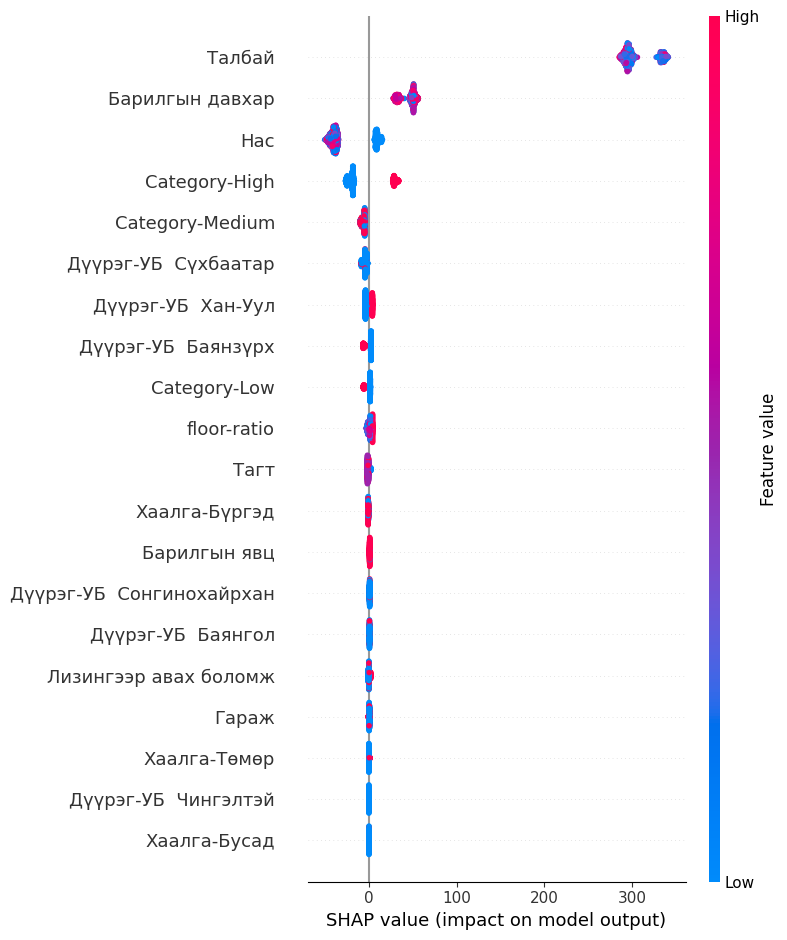

In [121]:
# Summary plot
shap.summary_plot(shap_values, X_test, feature_names = X.columns)

Gini Importance


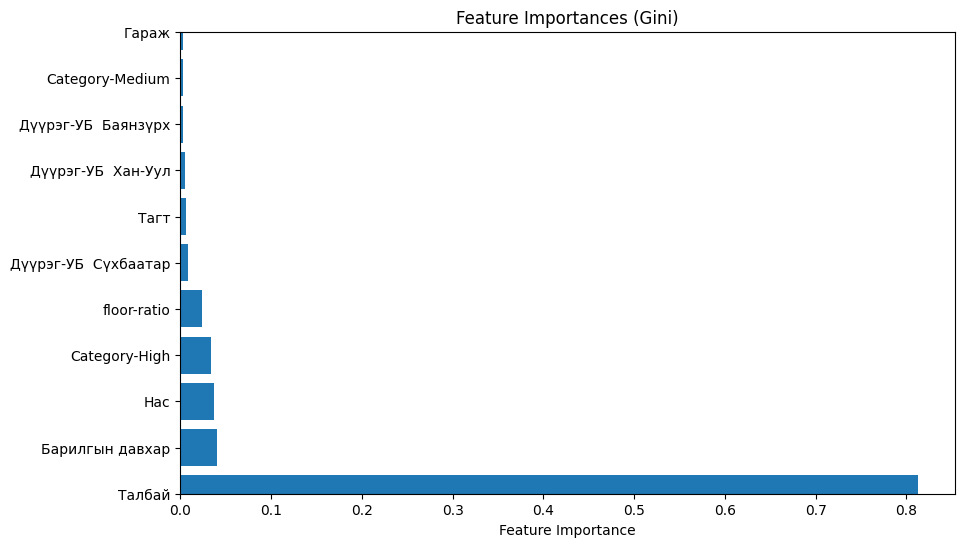

In [122]:
import matplotlib.pyplot as plt

importances = gb_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = X_train.columns[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_features)
plt.ylim(0, 10)
plt.xlabel('Feature Importance')
plt.title('Feature Importances (Gini)')
plt.show()


Lastly Random Forest is the best model and here are the accuracy values of the model so far.

R^2: 0.9230262479062367\
MAE: 27.528263486254463\
Relative MAE: 0.03589082592732003